In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 4.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!touch "/content/gdrive/MyDrive/NIM project/wuarun-7.nii"


touch: cannot touch '/content/gdrive/MyDrive/NIM project/wuarun-7.nii': No such file or directory


In [ ]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nilearn as nl
import os
from nilearn import image 
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

nl.masking.apply_mask(data, MASK_ICV, dtype='f', smoothing_fwhm=None, ensure_finite=True)

AttributeError: ignored

# New Section

In [ ]:
data = nib.load( "/content/gdrive/MyDrive/NIM_project/Coding and Data/wuarun-7.nii")

FileNotFoundError: ignored

# New Section

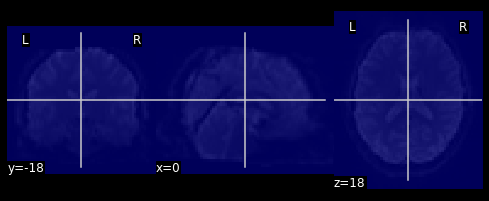

In [ ]:
d = data.get_fdata()
# d.shape
from nilearn.maskers import NiftiMasker
import nilearn.image as image
from nilearn.plotting import plot_roi, plot_epi, show


masker = NiftiMasker()
masker.fit(data)


data_mean_img = image.mean_img(data)
plot_roi(masker.mask_img_,data_mean_img)

# Masking data

 link for the below code:

 https://nilearn.github.io/dev/auto_examples/06_manipulating_images/plot_nifti_simple.html

In [ ]:
from nilearn.maskers import NiftiMasker

# we can change mask_strategy with : whole-brain-template > uses MNI , gm-template > for gray matter
nifti_masker = NiftiMasker(standardize=True, mask_strategy='epi',
                           memory="nilearn_cache", memory_level=2,
                           smoothing_fwhm=8, verbose=True, detrend= True)

nifti_masker.fit(data)
mask_img = nifti_masker.mask_img_
nifti_masker.fit(data)
fmri_masked = nifti_masker.transform(data)
# fmri_masked is now a 2D matrix, (n_voxels x n_time_points)

[NiftiMasker.fit] Loading data from Nifti1Image('/content/gdrive/MyDrive/NIM project/Coding and Data/wuarun-7.nii')
[NiftiMasker.fit] Computing the mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_epi_mask...
compute_epi_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7203032640>, verbose=0)


/usr/local/lib/python3.8/dist-packages/nilearn/maskers/nifti_masker.py:452: UserWarning: Persisting input arguments took 0.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  self.mask_img_ = self._cache(compute_mask, ignore=['verbose'])(


_________________________________________________compute_epi_mask - 1.1s, 0.0min
[NiftiMasker.fit] Resampling mask
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f71fc356ac0>, target_affine=None, target_shape=None, copy=False, interpolation='nearest')
_____________________________________________________resample_img - 0.0s, 0.0min
[NiftiMasker.fit] Loading data from Nifti1Image('/content/gdrive/MyDrive/NIM project/Coding and Data/wuarun-7.nii')
[NiftiMasker.fit] Computing the mask
[NiftiMasker.fit] Resampling mask
________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_masker._filter_and_mask...
_filter_and_mask(<nibabel.nifti1.Nifti1Image object at 0x7f7203032640>, <nibabel.nifti1.Nifti1Image object at 0x7f720309be50>, { 'detrend': True,
  'dtype': None,
  'high_pass': None,
  '

/usr/local/lib/python3.8/dist-packages/nilearn/maskers/base_masker.py:105: UserWarning: Persisting input arguments took 0.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  imgs = cache(


_______________________________________________________smooth_img - 3.2s, 0.1min
[NiftiMasker.transform_single_imgs] Extracting region signals
________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_masker.nifti_masker_extractor...
nifti_masker_extractor(<nibabel.nifti1.Nifti1Image object at 0x7f7201c5cd30>)
___________________________________________nifti_masker_extractor - 0.5s, 0.0min
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling nilearn.signal.clean...
clean(array([[415, ..., 404],
       ...,
       [391, ..., 381]], dtype=uint16), detrend=True, standardize=True, standardize_confounds=True, t_r=None, low_pass=None, high_pass=None, confounds=None, sample_mask=None, runs=None)
____________________________________________________________clean - 0.3s, 0.0min
__________________________________________________f

/usr/local/lib/python3.8/dist-packages/nilearn/maskers/nifti_masker.py:570: UserWarning: Persisting input arguments took 0.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  data = self._cache(


In [ ]:
report = nifti_masker.generate_report()
report
# fmri_masked.shape

Parameter,Value
detrend,True
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,epi
memory,Memory(location=nilearn_cache/joblib)
memory_level,2


In [ ]:
fmri_masked.shape

(170, 64516)

In [ ]:
print(masker.fit(data))


NiftiMasker()


In [ ]:
d = data.get_fdata()
d.shape
# d[1][1][1][:]

(61, 73, 61, 170)

In [ ]:
data.ndim

4

In [ ]:
type(data)

nibabel.nifti1.Nifti1Image

In [ ]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(data)
print(mask_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (61, 73, 61)
affine: 
[[  -3.    0.    0.   90.]
 [   0.    3.    0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 61 73 61  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
q

In [ ]:
from nilearn.masking import apply_mask
masked_data = apply_mask(data, mask_img)


In [ ]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(data)

# Visualize it as an ROI
from nilearn.plotting import plot_roi
# plot_roi(mask_img, 12)


In [ ]:
mask_img.shape

(61, 73, 61)

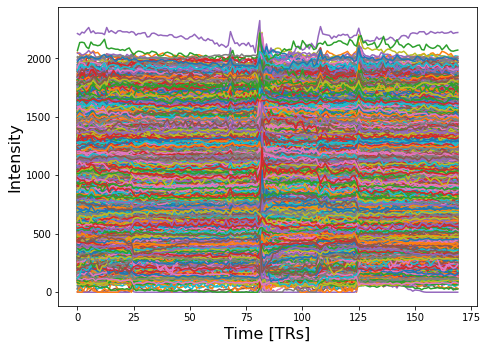

In [ ]:
# ----------------------------------------------------------
from nilearn.masking import apply_mask
masked_data = apply_mask(data, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels

# And now plot a few of these
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:, :])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
# plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [ ]:
from nilearn import image
smoothed_img = image.smooth_img("/content/gdrive/MyDrive/NIM project/Coding and Data/wuarun-7.nii",fwhm=3)  
smoothed_img

In [ ]:
smooth_anat_img = image.smooth_img("/content/gdrive/MyDrive/NIM project/Coding and Data/wuarun-7.nii", fwhm=3)
plotting.plot_img(smooth_anat_img)

NameError: ignored

In [ ]:
from nilearn import plotting
plotting.plot_img(data)

DimensionError: ignored

In [ ]:
d

memmap([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

In [ ]:
d[0][1][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# SAVING DATA

In [ ]:
#NIM fMRI data analysis
#Working with preprocessed data
#Reading Nifti data of subjects into a dictionary

def read_prep_data( sub ):

    #reading the data from nifti files
    rest1 = nib.load( "/workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-7.nii".format(sub)).get_fdata()        
    run1 = nib.load( "/workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-8.nii".format(sub)).get_fdata()
    run2 = nib.load( "/workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-9.nii".format(sub)).get_fdata()
    rest2 = nib.load( "/workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-10.nii".format(sub)).get_fdata()

    #reading specific mask files
    path = '/workspace3/data/nim_fmri_nemo/data/sub-00{}/'.format(sub)
    g_mask = 0
    w_mask = 0
    csf_mask = 0
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and 'wc1art_mean_' in i:
            g_mask=i 
        if os.path.isfile(os.path.join(path,i)) and 'wc2art_mean_' in i:
            w_mask=i
        if os.path.isfile(os.path.join(path,i)) and 'wc3art_mean_' in i:
            csf_mask=i 
    
    masks = [g_mask, w_mask, csf_mask]
    intersected_maske = nl.masking.intersect_masks(masks, threshold=0.1, connected=True)
    
    #making a masker specific to the subject from its file
    masker = NiftiMasker(mask_img= intersected_maske, standardize=True)
    

    # We give the masker a filename and retrieve a 2D array
    rest1_masked = masker.fit_transform(rest1)
    run1_masked = masker.fit_transform(run1)
    run2_masked = masker.fit_transform(run2)
    rest2_masked = masker.fit_transform(rest2)

In [ ]:
#NIM fMRI data analysis
#Working with preprocessed data
#Reading Nifti data of subjects into a dictionary


import nibabel as nib
import numpy as np



#we want to store our data from different folders to a single dictionary separated by subjects and sessions
DATA = dict()

for sub in range(0,9) :

    rest1 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-000{}/wuarun-7.nii".format(sub+1)).get_fdata()
    keys = 'subject{}_rest1'.format(sub+1)
    DATA[keys] =  rest1

    
    run1 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-000{}/wuarun-8.nii".format(sub+1)).get_fdata()
    keys = 'subject{}_run1'.format(sub+1)
    DATA[keys] =  run1

    run2 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-000{}/wuarun-9.nii".format(sub+1)).get_fdata()
    keys = 'subject{}_run2'.format(sub+1)
    DATA[keys] = run2


    rest2 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-000{}/wuarun-10.nii".format(sub+1)).get_fdata()
    keys = 'subject{}_rest2'.format(sub+1)
    DATA[keys] =  rest2


for sub in range(10,36):

    if sub == 16 :

        run1 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-8.nii".format(sub)).get_fdata()
        keys = 'subject{}_run1'.format(sub)
        DATA[keys] =  run1

        run2 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-9.nii".format(sub)).get_fdata()
        keys = 'subject{}_run2'.format(sub)
        DATA[keys] = run2


        rest2 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-10.nii".format(sub)).get_fdata()
        keys = 'subject{}_rest2'.format(sub)
        DATA[keys] =  rest2

    
    else: 
  
        rest1 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-7.nii".format(sub)).get_fdata()
        keys = 'subject{}_rest1'.format(sub)
        DATA[keys] =  rest1

        run1 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-8.nii".format(sub)).get_fdata()
        keys = 'subject{}_run1'.format(sub)
        DATA[keys] =  run1

        run2 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-9.nii".format(sub)).get_fdata()
        keys = 'subject{}_run2'.format(sub)
        DATA[keys] = run2

        rest2 = nib.load( "workspace3/data/nim_fmri_nemo/data/sub-00{}/wuarun-10.nii".format(sub)).get_fdata()
        keys = 'subject{}_rest2'.format(sub)
        DATA[keys] =  rest2


try:
    geeky_file = open('DATA_FILE.txt', 'wt')
    geeky_file.write(str(DATA))
    geeky_file.close()
  
except:
    print("Unable to write to file")













In [ ]:
data = nib.load( "/content/gdrive/MyDrive/NIM project/Coding and Data/wuarun-7.nii")

In [ ]:
rest1 = nib.load( "/content/gdrive/MyDrive/NIM project/Coding and Data/wuarun-7.nii").get_fdata()

In [ ]:
rest1

memmap([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

# to dolist:

In [ ]:
#mask and unmask, > regressout, filter, detrend
# search states finding/
# mask network/

# Basic codes for regress out process:

$ raw - Data = \beta \quad MEAN(CSF-SIGNALS)+ \beta \quad MEAN(WHITE-MATTER-SIGNALS) + \beta (MOTHIONS) + \epsilon $

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# # MOTION = open("/content/gdrive/MyDrive/NIM project/rp_arun-7.txt", "r")
# # # print(MOTION.readline())

In [ ]:
# import numpy as np

# import pandas as pd

# read_file = pd.read_csv (r'/content/gdrive/MyDrive/NIM project/rp_arun-7.txt')
# read_file.to_csv (r'/content/gdrive/MyDrive/NIM project/rp_arun-7.csv',)#, header= np.array(['index','x','y','z','r1','r2','r3']))

# rp = pd.read_csv('/content/gdrive/MyDrive/NIM project/rp_arun-7.csv')
# rp

In [ ]:
# import re
# with open('/content/gdrive/MyDrive/NIM project/rp_arun-7.txt', 'r') as reader:
#     text = reader.read()


# text = re.sub(r"(...)\n", r"\1,", text)
# print(text)

# with open('/content/gdrive/MyDrive/NIM project/output.csv', 'w') as writer:
#     writer.write(text)

In [ ]:


# MOTION = open("/content/gdrive/MyDrive/NIM project/rp_arun-7.txt", "r")
# # print(MOTION.readline())
# # MOTION.readlines()
# line = MOTION.readlines()
# # np.array(line)
# line

# /content/gdrive/MyDrive/NIM project/Coding and Data/wuarun-7.nii

In [ ]:
## SUBJECT1: REST1 MOTIONS

import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/NIM project/Coding and Data/rp_arun-7.txt', sep='  ', header=None)
df.to_csv('/content/gdrive/MyDrive/NIM project/Coding and Data/rp_arun-7.csv', index = None)
MOTION = pd.read_csv('/content/gdrive/MyDrive/NIM project/Coding and Data/rp_arun-7.csv')
MOTION


# MOTION.mean(axis=1).values
# MOTION

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,3.469447e-18
1,0.014500,0.026648,0.010054,-0.000630,-0.000380,-7.348740e-04
2,0.048873,0.100446,-0.055368,-0.001894,-0.001780,-2.340917e-03
3,0.039873,0.053698,-0.007910,-0.000834,-0.001911,-1.662654e-03
4,0.163431,0.209873,-0.059421,-0.006157,-0.004045,-9.816655e-04
...,...,...,...,...,...,...
165,0.522421,-0.343082,-0.155064,0.002099,-0.012165,-5.348210e-03
166,0.539474,-0.320077,-0.170879,0.001325,-0.012265,-5.043622e-03
167,0.556200,-0.282587,-0.184113,0.000544,-0.012411,-5.311678e-03
168,0.546208,-0.264628,-0.175430,0.000705,-0.012355,-5.239052e-03


In [ ]:

len(d[2,:,:,:])#-MOTION.mean(axis=1).values)


73

In [ ]:
# # len(V2)

# # # len(MOTION)
# # V2
# V2.shape
# len(d[i,j,k,:]-V2*beta)

In [ ]:
d.shape

(61, 73, 61, 170)

In [ ]:

D = d.copy()
type(d)
# np.memmap
d


memmap([[[[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ]],

         [[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
    

In [ ]:
# D[1][1][1][:]= np.ones(170)

# (D==d).sum()

46177440

In [ ]:

# 73*(61**2)*170 -46177440

170

In [ ]:

# np.set_printoptions(precision=5)

# D = d.copy()


D = rest1.copy()
d= rest1
from sklearn.linear_model import LinearRegression

V1 = MOTION.mean(axis=1).values

V2 = V1.reshape((-1,1))


# V2 = MIXED_DATA['reappraisal'] * V1

for i in range(61):
  for j in range(73):
    for k in range(61):

          y = d[i,j,k,:]
          model = LinearRegression()
          model.fit(V2,y)
          beta = model.coef_
          # beta = np.around(beta,100)

          # print(np.corrcoef(y,V1))
          # c = model.intercept_

          # .reshape((-1,1))
          # kk = d[i,j,k,:].reshape(-1,1) -  beta*V2
          D[i,j,k,:] = (d[i,j,k,:].reshape(-1,1) -  beta*V2).reshape(1,-1)[0]
          # print('beta is : {0} and \n regressour data is {1} and {2}\n and raw data is{2} \n'.format(beta, kk,D[i,j,k,:],d[i,j,k,:]))
          # print(beta)


#1/ MIXED_DATA['rumination'] .values

# np.corrcoef(V1,y)

In [ ]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [ ]:

beta

array([-0.])

In [ ]:
linear_regression(V1,y)

(0.0, 0.0, 'y = 0.0 + 0.0β')

In [ ]:
73*(61**2)*170

46177610

In [ ]:

(D == d).sum()

45428361

In [ ]:

D[40][10][50] 
# d[40][10][50] 

array([33.        , 38.72468417, 36.51047391, 36.54767667, 36.31493173,
       39.42972779, 39.19280888, 38.64172831, 42.02743017, 42.70689786,
       44.8512513 , 37.75993586, 42.72551359, 41.3517173 , 37.03779132,
       36.23257921, 38.20510541, 37.45741064, 40.54235752, 45.45217981,
       40.34331429, 43.15510082, 43.21281446, 37.19571041, 37.87953574,
       38.77617521, 41.7660287 , 35.87390598, 40.95263636, 42.91358163,
       39.94787035, 41.84450349, 37.51091107, 38.48880395, 38.62505869,
       45.55048949, 40.52966323, 45.43976987, 40.38975663, 36.37960795,
       42.18218285, 35.24512617, 39.51597791, 39.32630667, 38.39033834,
       42.24530788, 43.28289305, 40.41481676, 41.30435897, 38.36747161,
       42.43637119, 39.56783029, 48.67791629, 39.66210499, 42.42255839,
       36.54185407, 37.56658661, 40.41407832, 37.53546076, 44.4793078 ,
       38.68061576, 42.57837414, 40.42563541, 38.35101206, 43.63553175,
       40.56538025, 40.38486513, 43.18611398, 40.17690839, 41.26

In [ ]:

d[0,0,1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
D[0,0,1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
kk = d[i,j,k,:].reshape(-1,1) -  beta*V2

# np.array(kk)
# D[0,1,0,:]
d[i,j,k,:]

array([768., 775., 779., 789., 785., 784., 790., 801., 782., 783., 774.,
       788., 788., 786., 806., 783., 812., 790., 789., 789., 787., 776.,
       775., 789., 805., 798., 802., 791., 793., 791., 808., 805., 801.,
       806., 807., 803., 797., 790., 796., 785., 786., 795., 800., 803.,
       801., 799., 801., 810., 801., 809., 800., 802., 807., 811., 812.,
       798., 794., 801., 797., 803., 810., 804., 805., 801., 813., 807.,
       806., 804., 805., 803., 808., 806., 804., 805., 801., 804., 798.,
       814., 816., 787., 806., 794., 713., 726., 710., 709., 710., 713.,
       722., 718., 716., 710., 720., 722., 720., 731., 745., 741., 743.,
       745., 743., 759., 763., 760., 766., 749., 746., 782., 786., 784.,
       795., 769., 767., 775., 779., 776., 770., 765., 780., 771., 769.,
       768., 784., 778., 782., 806., 791., 791., 793., 799., 793., 799.,
       797., 799., 789., 794., 801., 789., 809., 788., 787., 794., 798.,
       811., 800., 799., 796., 804., 807., 803., 81

In [ ]:

D[i,j,k,:] = kk.reshape(1,-1) [0]
# kk

In [ ]:

D.shape
d

memmap([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [1., 1., 1., ..., 1., 1., 1.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

In [ ]:


# V2 = V2.reshape(-1,1)
# np.array(V2).reshape(-1,1)
V2 = V2.values.reshape((-1,1))

In [ ]:
y.shape
V2.shape

(85, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(V2,y)


LinearRegression()

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
ypred = model.predict(V2)

In [ ]:
model.score(V2,y)

0.24690214800235966

In [ ]:
# # file1 = open('myfile.txt', 'r')
# Lines = MOTION.readlines()
  
# count = 0
# # Strips the newline character
# for line in Lines:
#     count += 1
#     print("Line{}: {}".format(count, line.strip()))


In [ ]:
# #We read the existing text from file in READ mode.

# src=open("/content/gdrive/MyDrive/NIM project/rp_arun-7.txt","r")
# fline = "1 2 3 4 5 6\n" #Prepending string.
# oline = src.readlines()

# #Here, we prepend the string we want to on first line.
# oline.insert(0,fline)

# src.close()

# #We again open the file in WRITE mode.

# # pd.read_csv(oline)
# # f= open(oline,"w+") 
# # for i in range(10): 
# #   f.write("This is line %d\r\n" % (i+1)) ...
# # f.close() ...
# # f=open("guru99.txt", "a+")
# # df.to_csv('/content/gdrive/MyDrive/NIM project/rp_arun-7.csv', header=False)
# oline

['1 2 3 4 5 6\n',
 '   0.0000000e+00   0.0000000e+00   0.0000000e+00   0.0000000e+00   0.0000000e+00   3.4694470e-18\n',
 '   1.4499780e-02   2.6647544e-02   1.0054374e-02  -6.2982194e-04  -3.8025229e-04  -7.3487399e-04\n',
 '   4.8873415e-02   1.0044626e-01  -5.5367851e-02  -1.8941381e-03  -1.7800541e-03  -2.3409172e-03\n',
 '   3.9873130e-02   5.3698396e-02  -7.9099377e-03  -8.3417974e-04  -1.9110104e-03  -1.6626539e-03\n',
 '   1.6343145e-01   2.0987321e-01  -5.9420538e-02  -6.1574795e-03  -4.0453453e-03  -9.8166548e-04\n',
 '   1.3829998e-01   2.6746249e-01  -1.1197484e-01  -5.7286742e-03  -3.7822182e-03  -2.1986595e-03\n',
 '   8.6931049e-02   1.2413310e-01  -5.9184460e-02  -1.2744539e-03  -3.0232427e-03  -2.5810685e-03\n',
 '   5.3515949e-02   8.2039050e-02  -6.5469956e-02   9.4632053e-04  -2.6208197e-03  -4.0518994e-03\n',
 '   3.7941176e-02   1.4138566e-02  -5.1022067e-02   1.4027834e-03  -2.7355471e-03  -4.6523693e-03\n',
 '   5.8358512e-02   6.2054271e-03  -5.3497991e-03   1.

## REGRESS-OUT FUNCTION:

# New Section

In [ ]:
# In this function data is the raw data with the shape of (I,J,K,signal dimention) and motion is a matrix of (signal dimension, 6) dimension 

def Regressout(data, MOTION,CSF_mask )#, CSF_MASK, WHITE_MASK): #data is a 4d data

      # np.set_printoptions(precision=5)
      from sklearn.linear_model import LinearRegression


      D = data

      from sklearn.linear_model import LinearRegression

      v1 = CSF_mask.mean(axis=1).values

      
      v2 = MOTION.mean(axis=1).value
      # v3 = WHITE_MASK.mean(axis=1).values



      # v1 = CSF_MASK.mean(axis=1).values


      

      # V1 = v1.reshape((-1,1))
      # V3 = v3.reshape((-1,1))

      V1 = v1.reshape((-1,1))
      V2 = v2.reshape((-1,1))
      # V3 = v3.reshape((-1,1))
      V = V1+V2 #+V3


      # V = 


      I = data.shape[0]
      J = data.shape[1]
      K = data.shape[2]
      

      for i in range(I):
        for j in range(J):
          for k in range(K):

                y = data[i,j,k,:]
                model = LinearRegression()
                model.fit(V,y)
                beta = model.coef_
                # beta = np.around(beta,100)

                # print(np.corrcoef(y,V1))
                # c = model.intercept_

          # .reshape((-1,1))
          # kk = d[i,j,k,:].reshape(-1,1) -  beta*V2
                D[i,j,k,:] = (data[i,j,k,:].reshape(-1,1) -  beta*V).reshape(1,-1)[0]
          # print('beta is : {0} and \n regressour data is {1} and {2}\n and raw data is{2} \n'.format(beta, kk,D[i,j,k,:],d[i,j,k,:]))
          # print(beta)
          return(D)


#1/ MIXED_DATA['rumination'] .values

# np.corrcoef(V1,y)



In [ ]:
# CSF_SUB1_REST1 = nib.load( "/content/gdrive/MyDrive/NIM project/Coding and Data/wc3art_mean_uarun-7.nii")
# CSF_SUB1_REST1 = # mask-2d MATRIX


In [ ]:
128 s > 1/128 htz>> for low frequency= cut off

# New Section

In [ ]:
# In this function data is the raw data with the shape of (I,J,K,signal dimention) and motion is a matrix of (signal dimension, 6) dimension 

def Regressout(data, MOTION ) :#, CSF_MASK, WHITE_MASK): #data is a 4d data

      # np.set_printoptions(precision=5)
      from sklearn.linear_model import LinearRegression


      D = data

      from sklearn.linear_model import LinearRegression

      #v1 = CSF_mask.mean(axis=1).values

      
      v2 = MOTION.mean(axis=1).value
      # v3 = WHITE_MASK.mean(axis=1).values



      # v1 = CSF_MASK.mean(axis=1).values


      

      # V1 = v1.reshape((-1,1))
      # V3 = v3.reshape((-1,1))

      #V1 = v1.reshape((-1,1))
      V2 = v2.reshape((-1,1))
      # V3 = v3.reshape((-1,1))
      V = V2 #+V3+ V1


      # V = 


      I = data.shape[0]
      J = data.shape[1]
      K = data.shape[2]
      

      for i in range(I):
        for j in range(J):
          for k in range(K):

                y = data[i,j,k,:]
                model = LinearRegression()
                model.fit(V,y)
                beta = model.coef_
                # beta = np.around(beta,100)

                # print(np.corrcoef(y,V1))
                # c = model.intercept_

          # .reshape((-1,1))
          # kk = d[i,j,k,:].reshape(-1,1) -  beta*V2
                D[i,j,k,:] = (data[i,j,k,:].reshape(-1,1) -  beta*V).reshape(1,-1)[0]
          # print('beta is : {0} and \n regressour data is {1} and {2}\n and raw data is{2} \n'.format(beta, kk,D[i,j,k,:],d[i,j,k,:]))
          # print(beta)
          return(D)


#1/ MIXED_DATA['rumination'] .values

# np.corrcoef(V1,y)



In [ ]:
from scipy import signal
import scipy 
import nibabel as nib
import numpy as np
import nilearn as nl 
import os 
from nilearn.maskers import NiftiMasker
import nilearn.image as image
from nilearn.plotting import plot_roi, plot_epi, show
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [ ]:

rest1 = data.get_fdata()

In [ ]:
# import pandas as pd
# df = pd.read_csv('C:/Users/Reyhan/Desktop/rp_arun-7.txt', sep='  ', header=None)
# df.to_csv('C:/Users/Reyhan/Desktop/rp_arun-7.csv', index = None)
# MOTION = pd.read_csv('C:/Users/Reyhan/Desktop/rp_arun-7.csv')

In [ ]:
# regressouted_signal = Regressout(rest1 ,MOTION )
regressouted_signal = D.copy()




In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0.00000001, 1))


# NORMALAIZED_REST = rest_detrend.copy()

# I = rest_detrend.shape[0]
# J = rest_detrend.shape[1]
# K = rest_detrend.shape[2]
# for i in range(I):
#     for j in range(J):
#         for k in range(K):

#             scaler.fit(rest_detrend[i,j,k,:].reshape(-1,1))
            
# #             NORMALAIZED_REST[i,j,k,:] = 
#             NORMALAIZED_REST[i,j,k,:] = scaler.transform(rest_detrend[i,j,k,:].reshape(-1,1)).flatten()

# #              print(rest_detrend[i,j,k,:])

                
                


In [ ]:
n_row= 61*61*73

n_col = 170

d1 = np.reshape(regressouted_signal, (n_row,n_col))

In [ ]:

D_reshaped = nl.signal.clean(d1, runs=None, detrend=True, standardize='zscore', sample_mask=None, 
                     confounds=None, standardize_confounds=True, filter='butterworth',
                     low_pass=None, high_pass=None, t_r=2.43, ensure_finite=False)

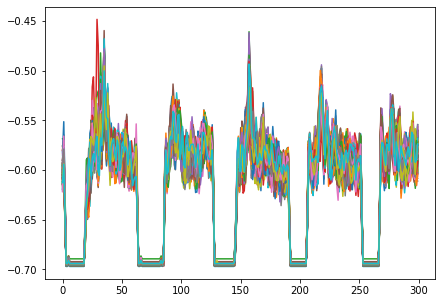

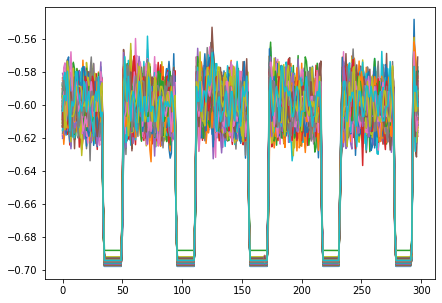

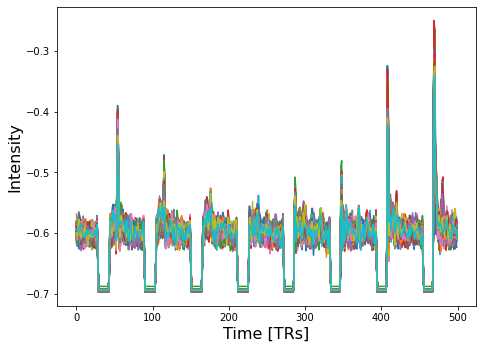

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(D_reshaped[40000:40300][:])
plt.figure(figsize=(7, 5))
plt.plot(D_reshaped[202:500][:])
plt.figure(figsize=(7, 5))
plt.plot(D_reshaped[1000:1500][:])

plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
# plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [ ]:
REST = np.reshape(D_reshaped, (61, 73, 61, 170))

In [ ]:
from nilearn.maskers import NiftiMasker

# we can change mask_strategy with : whole-brain-template > uses MNI , gm-template > for gray matter
nifti_masker = NiftiMasker(standardize=False, mask_strategy='epi',
                           memory="nilearn_cache", memory_level=2,
                           smoothing_fwhm=8, verbose=True, detrend= False)

nifti_masker.fit(REST)
mask_img = nifti_masker.mask_img_
nifti_masker.fit(REST)
fmri_masked = nifti_masker.transform(REST)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_epi_mask...
compute_epi_mask(array([[[[-0.695346, ..., -0.694067],
         ...,
         [-0.695346, ..., -0.694067]],

        ...,

        [[-0.695325, ..., -0.694071],
         ...,
         [-0.695324, ..., -0.694071]]],


       ...,


       [[[-0.694059, ..., -0.694333],
         ...,
         [-0.694058, ..., -0.694333]],

        ...,

        [[-0.694037, ..., -0.694337],
         ...,
         [-0.694037, ..., -0.694337]]]]), verbose=0)


TypeError: ignored